In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import os
print(os.getcwd())
os.chdir("/Users/IshaanShah/Desktop/weather_data")
print(os.getcwd())

/Users/IshaanShah
/Users/IshaanShah/Desktop/weather_data


In [3]:
weather = pd.read_csv("california.csv")
weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2015-01-01,5,-4,0.0,8.7,2,72,03:24 PM,04:37 AM,08:00 AM,...,9,0,23,0.0,1020,5,10,153,5,california
1,2015-01-02,8,-2,0.0,8.7,2,80,04:11 PM,05:35 AM,08:00 AM,...,7,1,33,0.0,1020,8,10,228,4,california
2,2015-01-03,10,1,0.0,8.7,3,87,05:02 PM,06:28 AM,08:01 AM,...,14,3,30,0.0,1023,10,10,247,7,california
3,2015-01-04,12,2,0.0,8.7,3,94,05:55 PM,07:19 AM,08:01 AM,...,8,3,40,0.0,1027,12,10,164,4,california
4,2015-01-05,14,3,0.0,8.7,4,100,06:49 PM,08:04 AM,08:01 AM,...,13,1,30,0.0,1027,14,10,81,7,california


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          2193 non-null   object 
 1   maxtempC           2193 non-null   int64  
 2   mintempC           2193 non-null   int64  
 3   totalSnow_cm       2193 non-null   float64
 4   sunHour            2193 non-null   float64
 5   uvIndex            2193 non-null   int64  
 6   moon_illumination  2193 non-null   int64  
 7   moonrise           2193 non-null   object 
 8   moonset            2193 non-null   object 
 9   sunrise            2193 non-null   object 
 10  sunset             2193 non-null   object 
 11  DewPointC          2193 non-null   int64  
 12  FeelsLikeC         2193 non-null   int64  
 13  HeatIndexC         2193 non-null   int64  
 14  WindChillC         2193 non-null   int64  
 15  WindGustKmph       2193 non-null   int64  
 16  cloudcover         2193 

In [5]:
#Converting to date
weather['date_time'] = pd.to_datetime(weather['date_time'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date_time          2193 non-null   datetime64[ns]
 1   maxtempC           2193 non-null   int64         
 2   mintempC           2193 non-null   int64         
 3   totalSnow_cm       2193 non-null   float64       
 4   sunHour            2193 non-null   float64       
 5   uvIndex            2193 non-null   int64         
 6   moon_illumination  2193 non-null   int64         
 7   moonrise           2193 non-null   object        
 8   moonset            2193 non-null   object        
 9   sunrise            2193 non-null   object        
 10  sunset             2193 non-null   object        
 11  DewPointC          2193 non-null   int64         
 12  FeelsLikeC         2193 non-null   int64         
 13  HeatIndexC         2193 non-null   int64         
 14  WindChil

In [6]:
#Keeping only the useful weather features

cols_to_drop = ["totalSnow_cm","uvIndex","sunHour","moon_illumination","moonrise","moonset","sunrise","sunset","DewPointC",
                "FeelsLikeC","HeatIndexC","WindChillC","cloudcover","WindGustKmph","visibility","winddirDegree",
                "mintempC","maxtempC"]
weather_clean = weather.drop(cols_to_drop, axis = 1)
weather_clean.head()

,date_time,humidity,precipMM,pressure,tempC,windspeedKmph,location
0,2015-01-01,23,0.0,1020,5,5,california
1,2015-01-02,33,0.0,1020,8,4,california
2,2015-01-03,30,0.0,1023,10,7,california
3,2015-01-04,40,0.0,1027,12,4,california
4,2015-01-05,30,0.0,1027,14,7,california


In [7]:
CO_15 = pd.read_csv("CO_2015.csv")
CO_16 = pd.read_csv("CO_2016.csv")
CO_17 = pd.read_csv("CO_2017.csv")
CO_18 = pd.read_csv("CO_2018.csv")
CO_19 = pd.read_csv("CO_2019.csv")
CO_20 = pd.read_csv("CO_2020.csv")

In [8]:
print(CO_15.shape)
print(CO_16.shape)
print(CO_17.shape)
print(CO_18.shape)
print(CO_19.shape)
print(CO_20.shape)

(24964, 20)
(25084, 20)
(24342, 20)
(24577, 20)
(22290, 20)
(22135, 20)


In [9]:
#Combining 6 years of data into one df
CO = pd.concat([CO_15,CO_16,CO_17,CO_18,CO_19,CO_20], ignore_index = True)
CO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143392 entries, 0 to 143391
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               143392 non-null  object 
 1   Source                             143392 non-null  object 
 2   Site ID                            143392 non-null  int64  
 3   POC                                143392 non-null  int64  
 4   Daily Max 8-hour CO Concentration  143392 non-null  float64
 5   UNITS                              143392 non-null  object 
 6   DAILY_AQI_VALUE                    143392 non-null  int64  
 7   Site Name                          143392 non-null  object 
 8   DAILY_OBS_COUNT                    143392 non-null  int64  
 9   PERCENT_COMPLETE                   143392 non-null  float64
 10  AQS_PARAMETER_CODE                 143392 non-null  int64  
 11  AQS_PARAMETER_DESC                 1433

In [10]:
#Keeping only the useful columns
CO = CO[["Date","Daily Max 8-hour CO Concentration"]]

In [11]:
CO["Date"] = pd.to_datetime(CO["Date"])

In [12]:
#Removing multiple sites by averaging across the state
CO_clean = CO.groupby(CO["Date"]).mean("Daily Max 8-hour CO Concentration").reset_index()
CO_clean.head()

,Date,Daily Max 8-hour CO Concentration
0,2015-01-01,0.808333
1,2015-01-02,0.892857
2,2015-01-03,0.925352
3,2015-01-04,0.947887
4,2015-01-05,0.857143


In [13]:
#Creating the final dataset
pollution = pd.merge(weather_clean,CO_clean, left_on = "date_time", right_on = "Date", how = "right").drop('Date', axis = 1)
pollution.head()

,date_time,humidity,precipMM,pressure,tempC,windspeedKmph,location,Daily Max 8-hour CO Concentration
0,2015-01-01,23,0.0,1020,5,5,california,0.808333
1,2015-01-02,33,0.0,1020,8,4,california,0.892857
2,2015-01-03,30,0.0,1023,10,7,california,0.925352
3,2015-01-04,40,0.0,1027,12,4,california,0.947887
4,2015-01-05,30,0.0,1027,14,7,california,0.857143


In [14]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 0 to 2191
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date_time                          2192 non-null   datetime64[ns]
 1   humidity                           2192 non-null   int64         
 2   precipMM                           2192 non-null   float64       
 3   pressure                           2192 non-null   int64         
 4   tempC                              2192 non-null   int64         
 5   windspeedKmph                      2192 non-null   int64         
 6   location                           2192 non-null   object        
 7   Daily Max 8-hour CO Concentration  2192 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 154.1+ KB


In [15]:
#Renaming variables
pollution["CO_Conc"] = pollution['Daily Max 8-hour CO Concentration']
pollution = pollution.drop('Daily Max 8-hour CO Concentration', axis = 1)

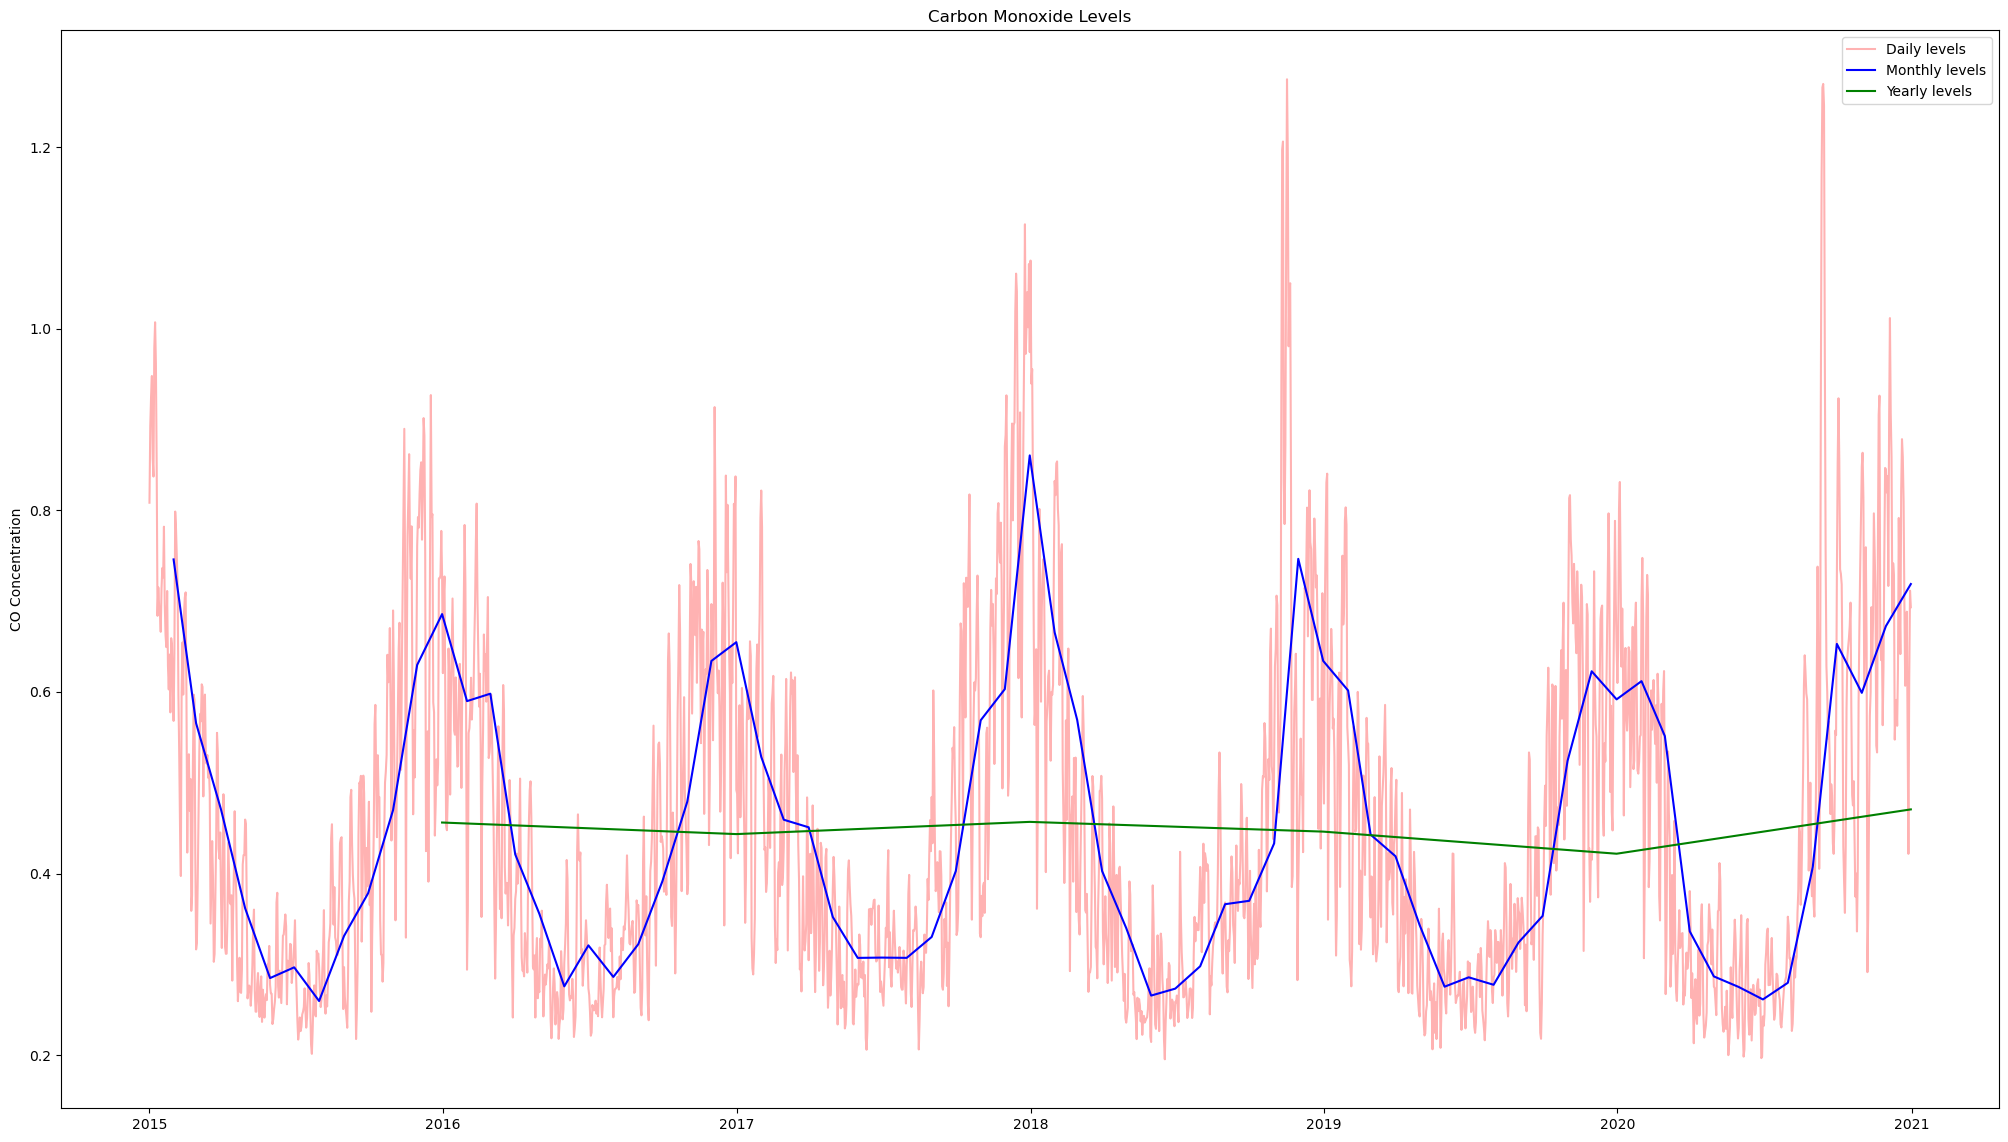

In [16]:
#Visualizing the trend in data
pollution_month = pollution.groupby(pd.Grouper(key = "date_time", freq = "1M")).mean().reset_index()
pollution_year = pollution.groupby(pd.Grouper(key = "date_time", freq = "Y")).mean().reset_index()
fig = plt.figure(figsize = (25,14))
plt.plot(pollution["date_time"],pollution['CO_Conc'], color = "red",alpha = 0.3, label = "Daily levels")
plt.plot(pollution_month["date_time"],pollution_month['CO_Conc'], color = "blue", label = "Monthly levels")
plt.plot(pollution_year["date_time"],pollution_year['CO_Conc'], color = "green", label = "Yearly levels")
plt.title("Carbon Monoxide Levels")
plt.ylabel("CO Concentration")
plt.legend(loc = 'upper right')
plt.show()


Here, we can see carbon monoxide levels on a daily, monthly, and yearly level. We can see a clear trend in the daily and monthly levels, indicating that Carbon Monoxide levels increase and decrease cyclically. The yearly trend line indicates there were no steep increases or decreases per year. However, we can see a slight dip for the year 2020 which maybe due to the COVID-19 Pandemic and lockdowns in California.

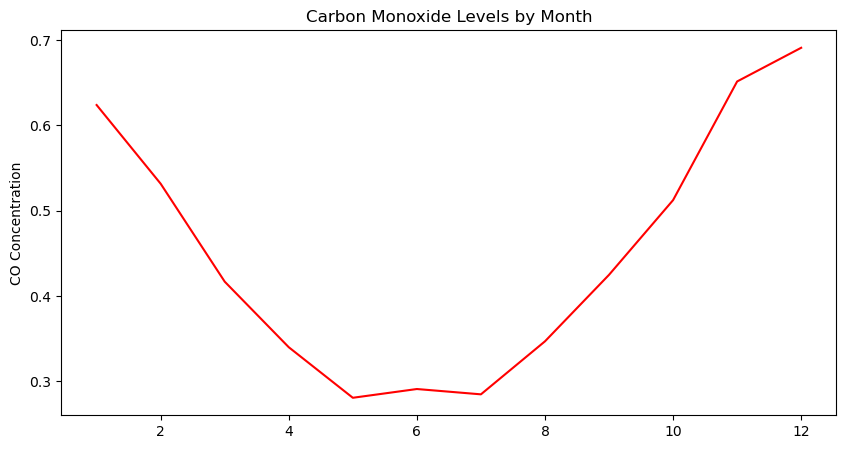

In [17]:
#Assessing variability by month
pollution_by_month = pollution.groupby([pollution["date_time"].dt.month])["CO_Conc"].mean().reset_index()
fig= plt.figure(figsize = (10,5))
plt.plot(pollution_by_month["date_time"],pollution_by_month['CO_Conc'], color = "red")
plt.title("Carbon Monoxide Levels by Month")
plt.ylabel("CO Concentration")
plt.show()

Looking at the same data to analyze its cyclical trend, we see that carbon monoxide levels in California tend to be the highest during the months of November, December, and January. It is tough to point out one reason for such a trend as Carbon Monoxide has a variety of contributors. Sources of air pollution in California include vehicular emissions, demand for energy production through fossil fuels, and household energy consumption as well as wildfires as a prominent natural cause. Changes in weather amplify the number of wildfires in California.

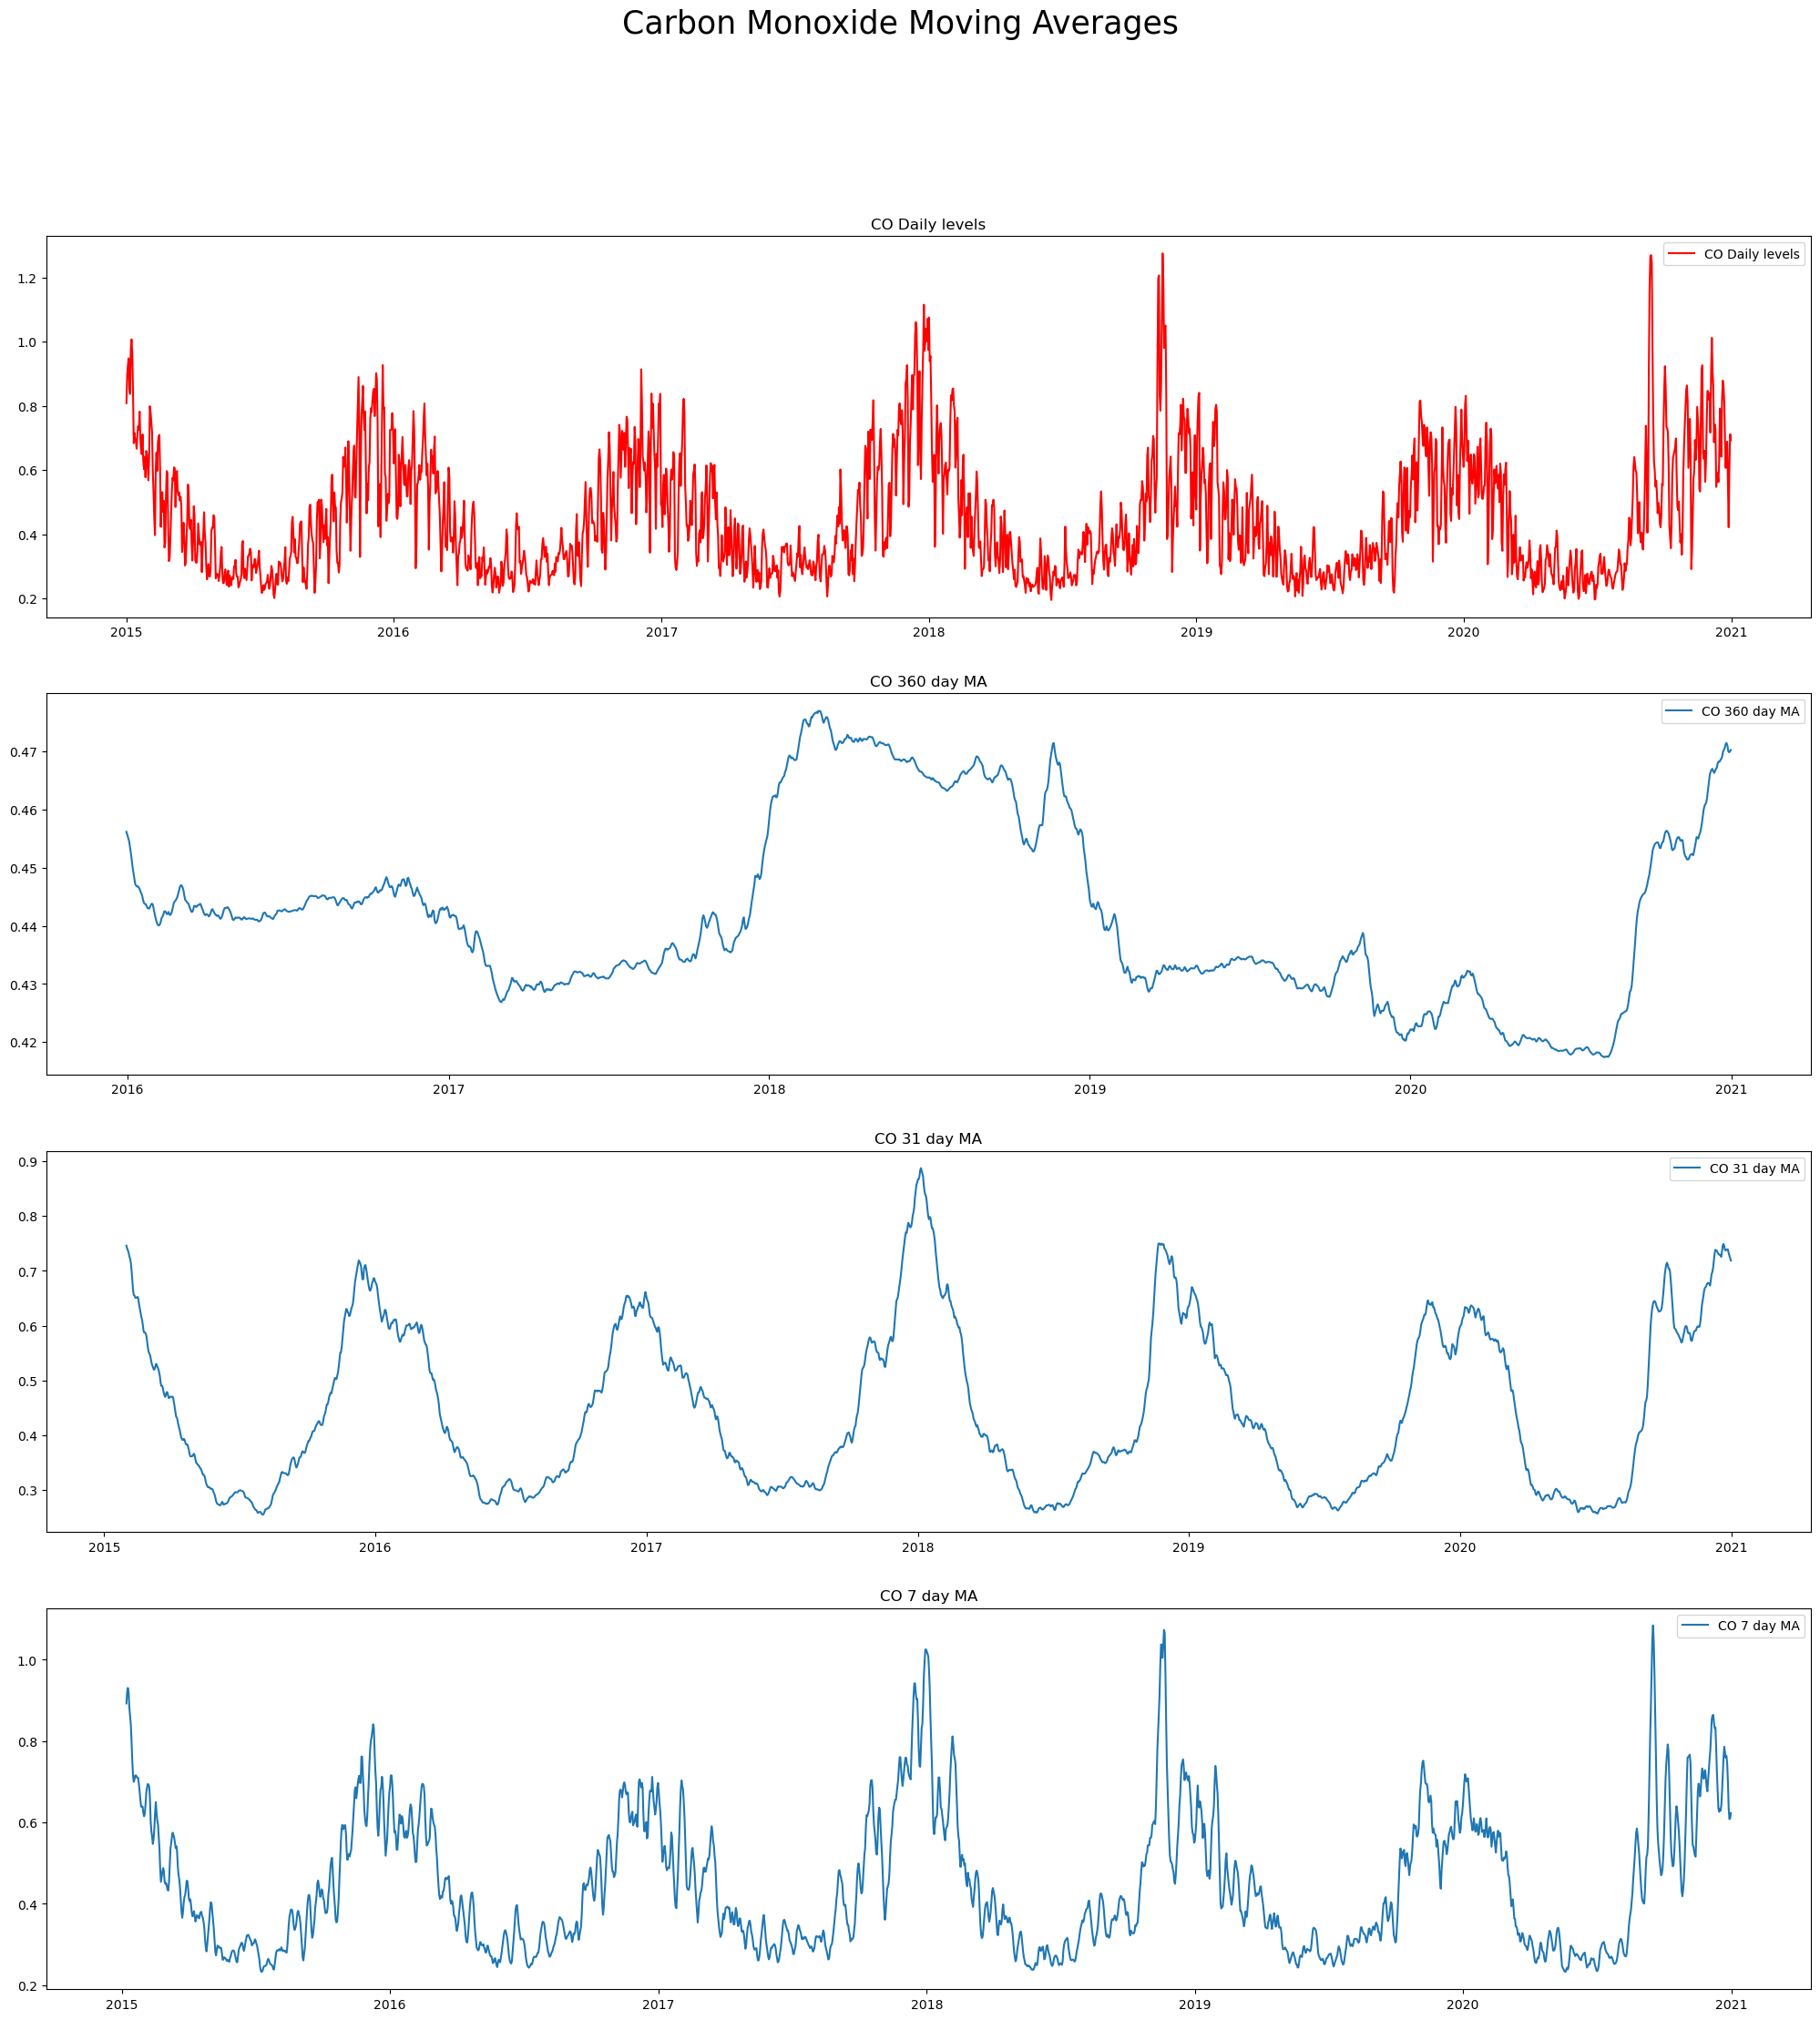

In [18]:
fig,ax = plt.subplots(4,1, figsize = (25,25), sharex = False)
ax[0].plot(pollution["date_time"],pollution['CO_Conc'], color = "red", label = "CO Daily levels")
ax[0].set_title("CO Daily levels")
ax[0].legend()
ax[1].plot(pollution["date_time"],pollution["CO_Conc"].rolling(window = 365).mean(),label = "CO 360 day MA")
ax[1].set_title("CO 360 day MA")
ax[1].legend()
ax[2].plot(pollution["date_time"],pollution["CO_Conc"].rolling(window = 31).mean(),label = "CO 31 day MA")
ax[2].set_title("CO 31 day MA")
ax[2].legend()
ax[3].plot(pollution["date_time"],pollution["CO_Conc"].rolling(window = 7).mean(),label = "CO 7 day MA")
ax[3].set_title("CO 7 day MA")
ax[3].legend()
fig.suptitle("Carbon Monoxide Moving Averages", fontsize = 25)
plt.show()

Using moving averages to smooth the time series data gives us a better understanding of the cyclical trends present in the data. It removes noise, making the data more clear. The monthly (31 day) and weekly (7 day) moving averages reiterate the cyclical nature of carbon monoxide levels. The yearly (360 day) moving average shows that carbon monoxide levels were the highest around 2018 and 2019. 2020 saw a dip in CO levels and it can probably be due to the pandemic which led to heavy restrictions on movement in California. California was also one of the most badly affected states in this pandemic and hence had stricter and longer restictrions which may have helped reduce CO levels. However, as the situation improved towards the end of 2020, and restrictions were relaxed, the levels are back on the rise.

In [19]:
# Adding a day variable to analyze any interesting trends
pollution["weekday"] = pollution["date_time"].dt.strftime("%A")

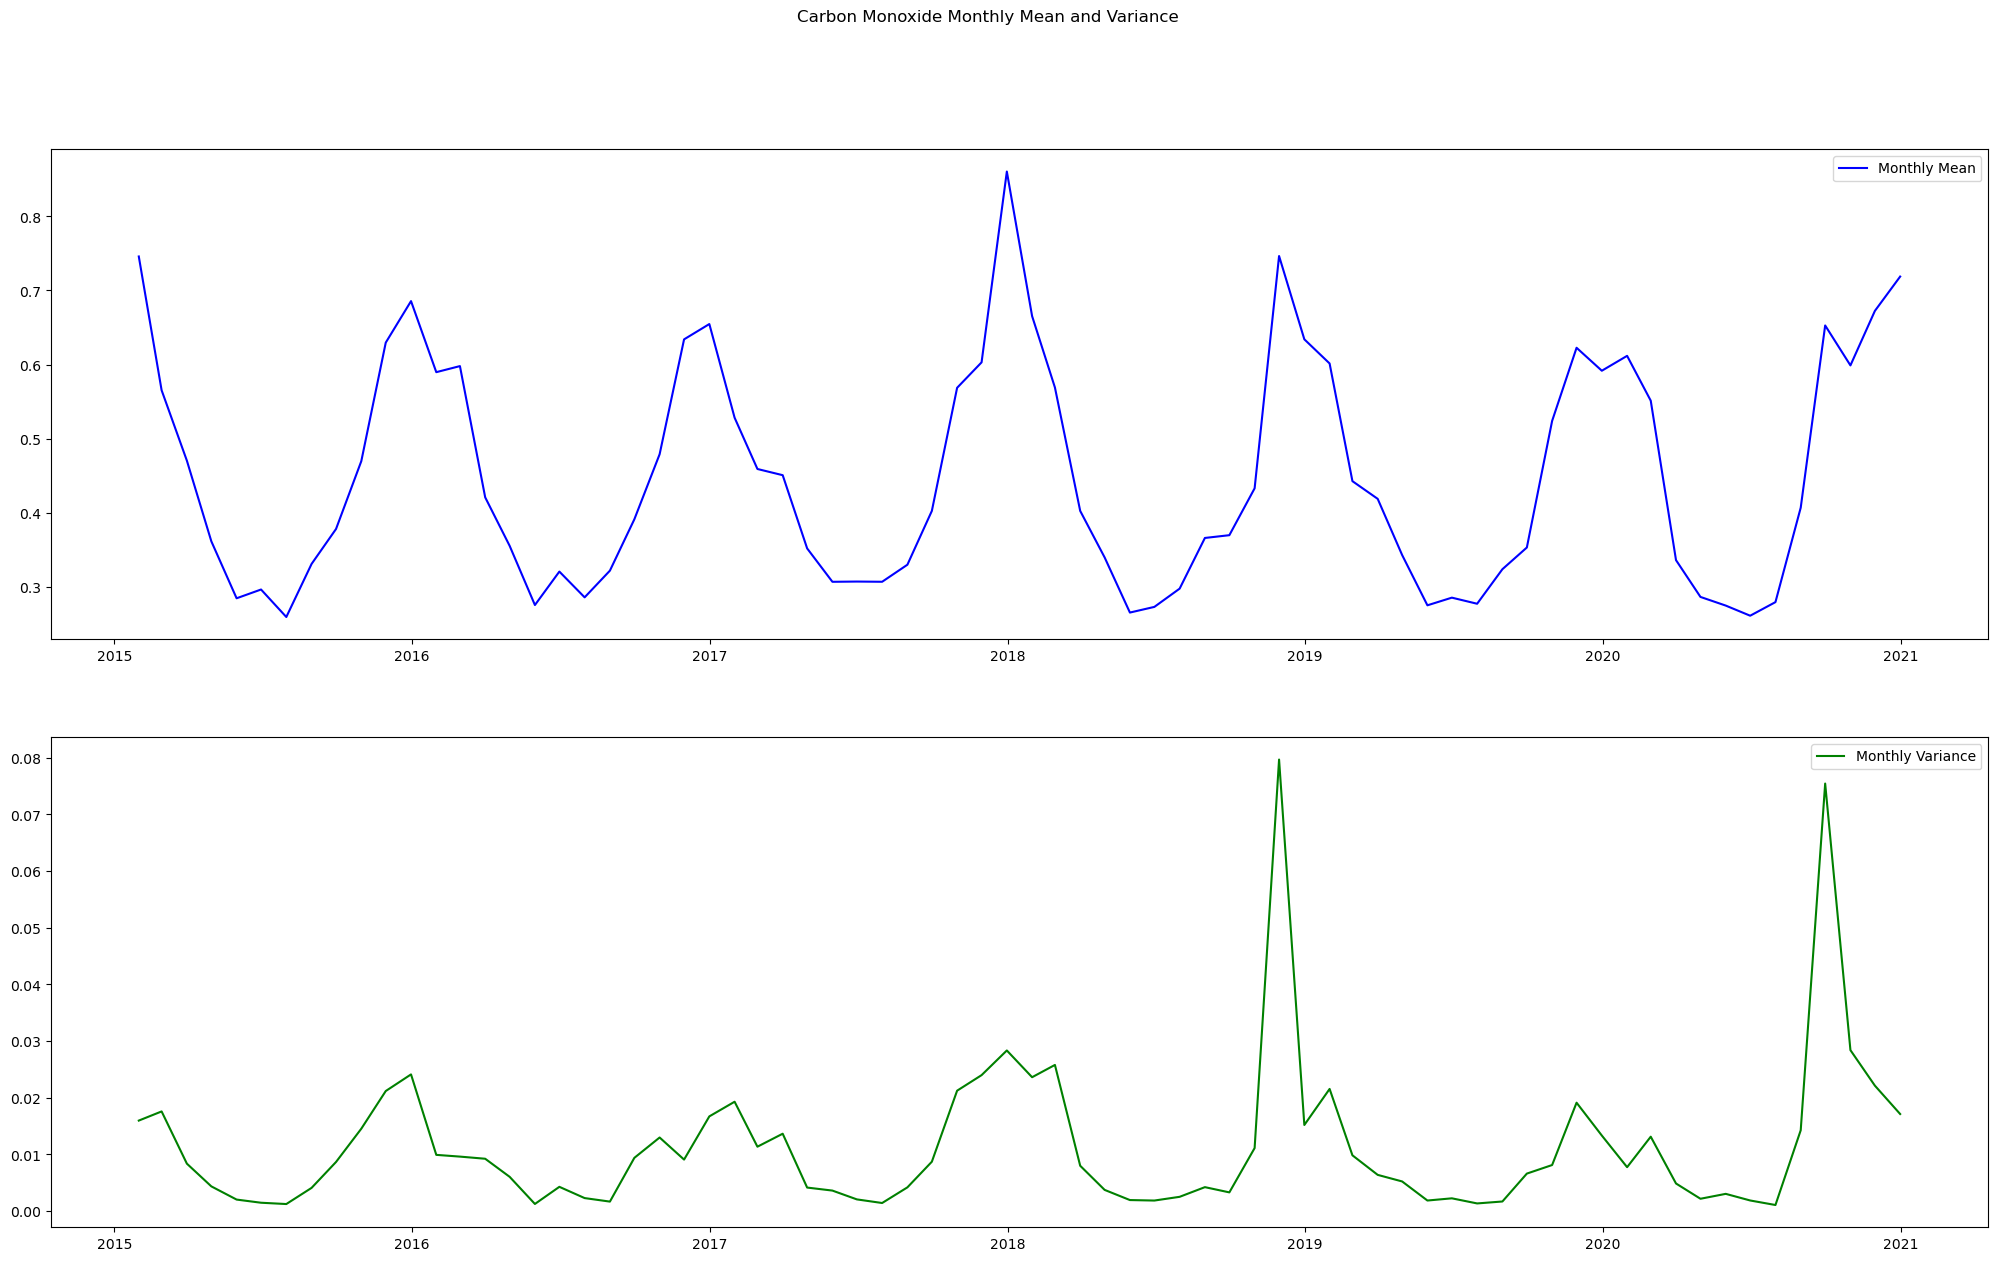

In [20]:
# Checking CO for stationarity for further ARIMA analysis
pollution_month_mean = pollution.groupby(pd.Grouper(key = "date_time", freq = "1M")).mean().reset_index()
pollution_month_var = pollution.groupby(pd.Grouper(key = "date_time", freq = "1M")).var().reset_index()
fig,ax = plt.subplots(2,1,figsize = (25,14))
ax[0].plot(pollution_month_mean["date_time"],pollution_month_mean['CO_Conc'], color = "blue", label = "Monthly Mean")
ax[1].plot(pollution_month_var["date_time"],pollution_month_var['CO_Conc'], color = "green", label = "Monthly Variance")
fig.suptitle("Carbon Monoxide Monthly Mean and Variance")
ax[0].legend(loc = 'upper right')
ax[1].legend(loc = 'upper right')
plt.show()


Time series forecasting focuses on utilizing the past values of the series itself to forecast the future. To conduct such analysis I decided to use an ARIMA model. ARIMA stands for Auto Regressed Integrated Moving Averages. To use such a model, we need to ensure our time series is stationary. In this case, stationary implies the series is mean-reverting. This means that a stationary time series is one whose statistical properties don't depend on time. This is important as an ARIMA model uses its own lags as predictors. Hence, if the underlying distribution of the time series is changing, it is tough to make predictions. To check stationarity we can look at the plots above.

For the mean we can see there is no clear trend in respect to time (i.e. it is not increasing or decreasing). Refer to the image below. One can see there was high variance in the data in the end of 2018 and 2020. However, the spikes are random and not a trend. Hence, it looks like this series is stationary. However, lets analyze it further.

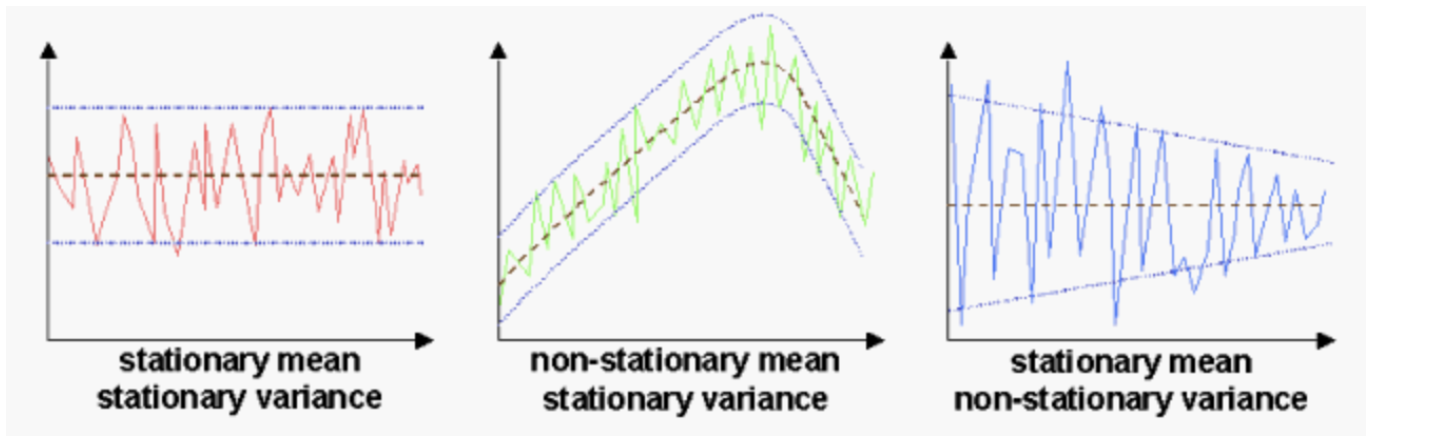

In [25]:
import statsmodels

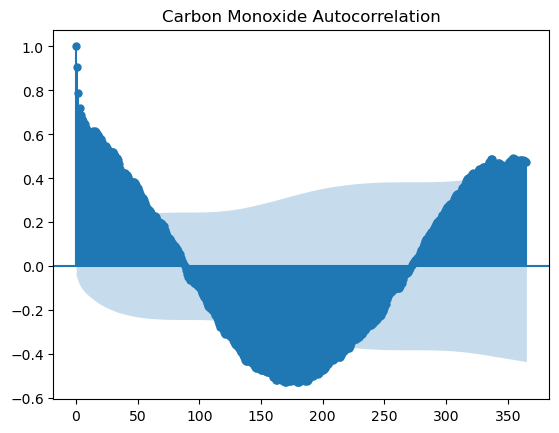

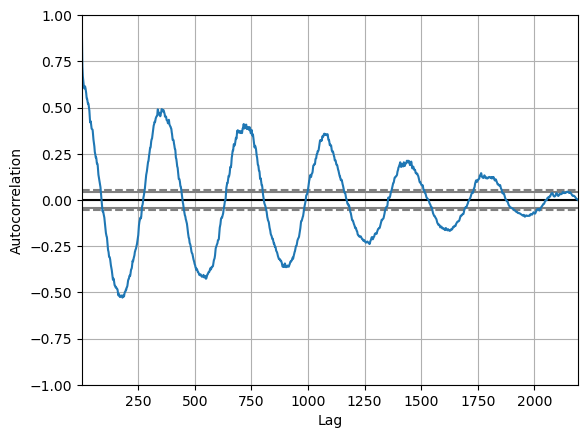

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pollution["CO_Conc"], lags = 365)
plt.title('Carbon Monoxide Autocorrelation')
plt.show()
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(pollution["CO_Conc"])
plt.show()

As time series forecasting uses previous values to estimate future values, it is important to see autocorrelation plots. An autocorrelation plot ananlyzes how correlated a series is, with a lagged version of itself. The number of intervals between the two observations is the lag. The plots above show the autocorrrelation for CO levels. A stationary time series plot will have a constant autocorrelation pattern. The blue bands and grey bands denote significance levels. There is a repeating pattern every ~350 days indicating the yearly trend we have seen above. The first plot also indicates that days close to each other are highly correlated.

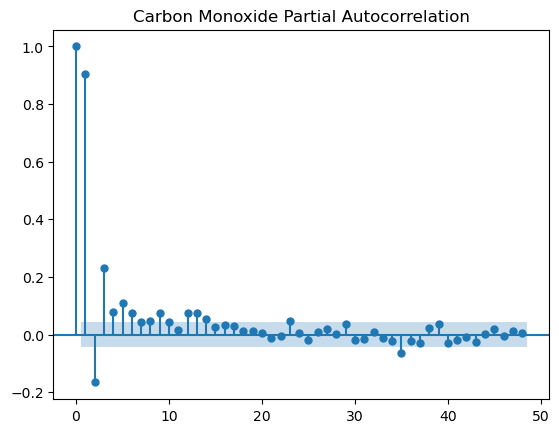

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pollution["CO_Conc"], lags = 48)
plt.title('Carbon Monoxide Partial Autocorrelation')
plt.show()

A Partial Autocorrelation plot depicts the correlation between two observations that the shorter lags between those observations do not explain. The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags. Here we see, that lags or order 1-4 are highly statistically significant. We can use this to create our ARIMA model later on.

In [28]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(pollution["CO_Conc"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.764269
p-value: 0.003295
	1%: -3.433
	5%: -2.863
	10%: -2.567


An ADF test checks the stationarity of the series using 2 hypotheses. The null hypothesis is that the series is not stationary while the alternative hypothesis is the series is stationary. Series is stationary as test statistic (-3.74) is lesser than the critical values for 99% CI, 95% CI and 90% CI and we can reject the null hypothesis.

An ARIMA model has 3 parameters : p, d, and q.   
p is the number of lags to use a predictors. Above we decided a value between 1-4 will be appropriate
d is the number of orders of diffrencing. Diffrencing once is subtracting the current value from the previous value. It is done to convert a non stationary time series into a stationary time series. However as our data is already stationary, d = 0.  
q denotes the lag of the error component, where error component is a part of the time series not explained by trend or seasonality. As the data is stationay we can set it to 0 for now.  
However, we will tune the values for pdq as we carry on our ARIMA analysis. The values discussed above are rough values from graph observations.

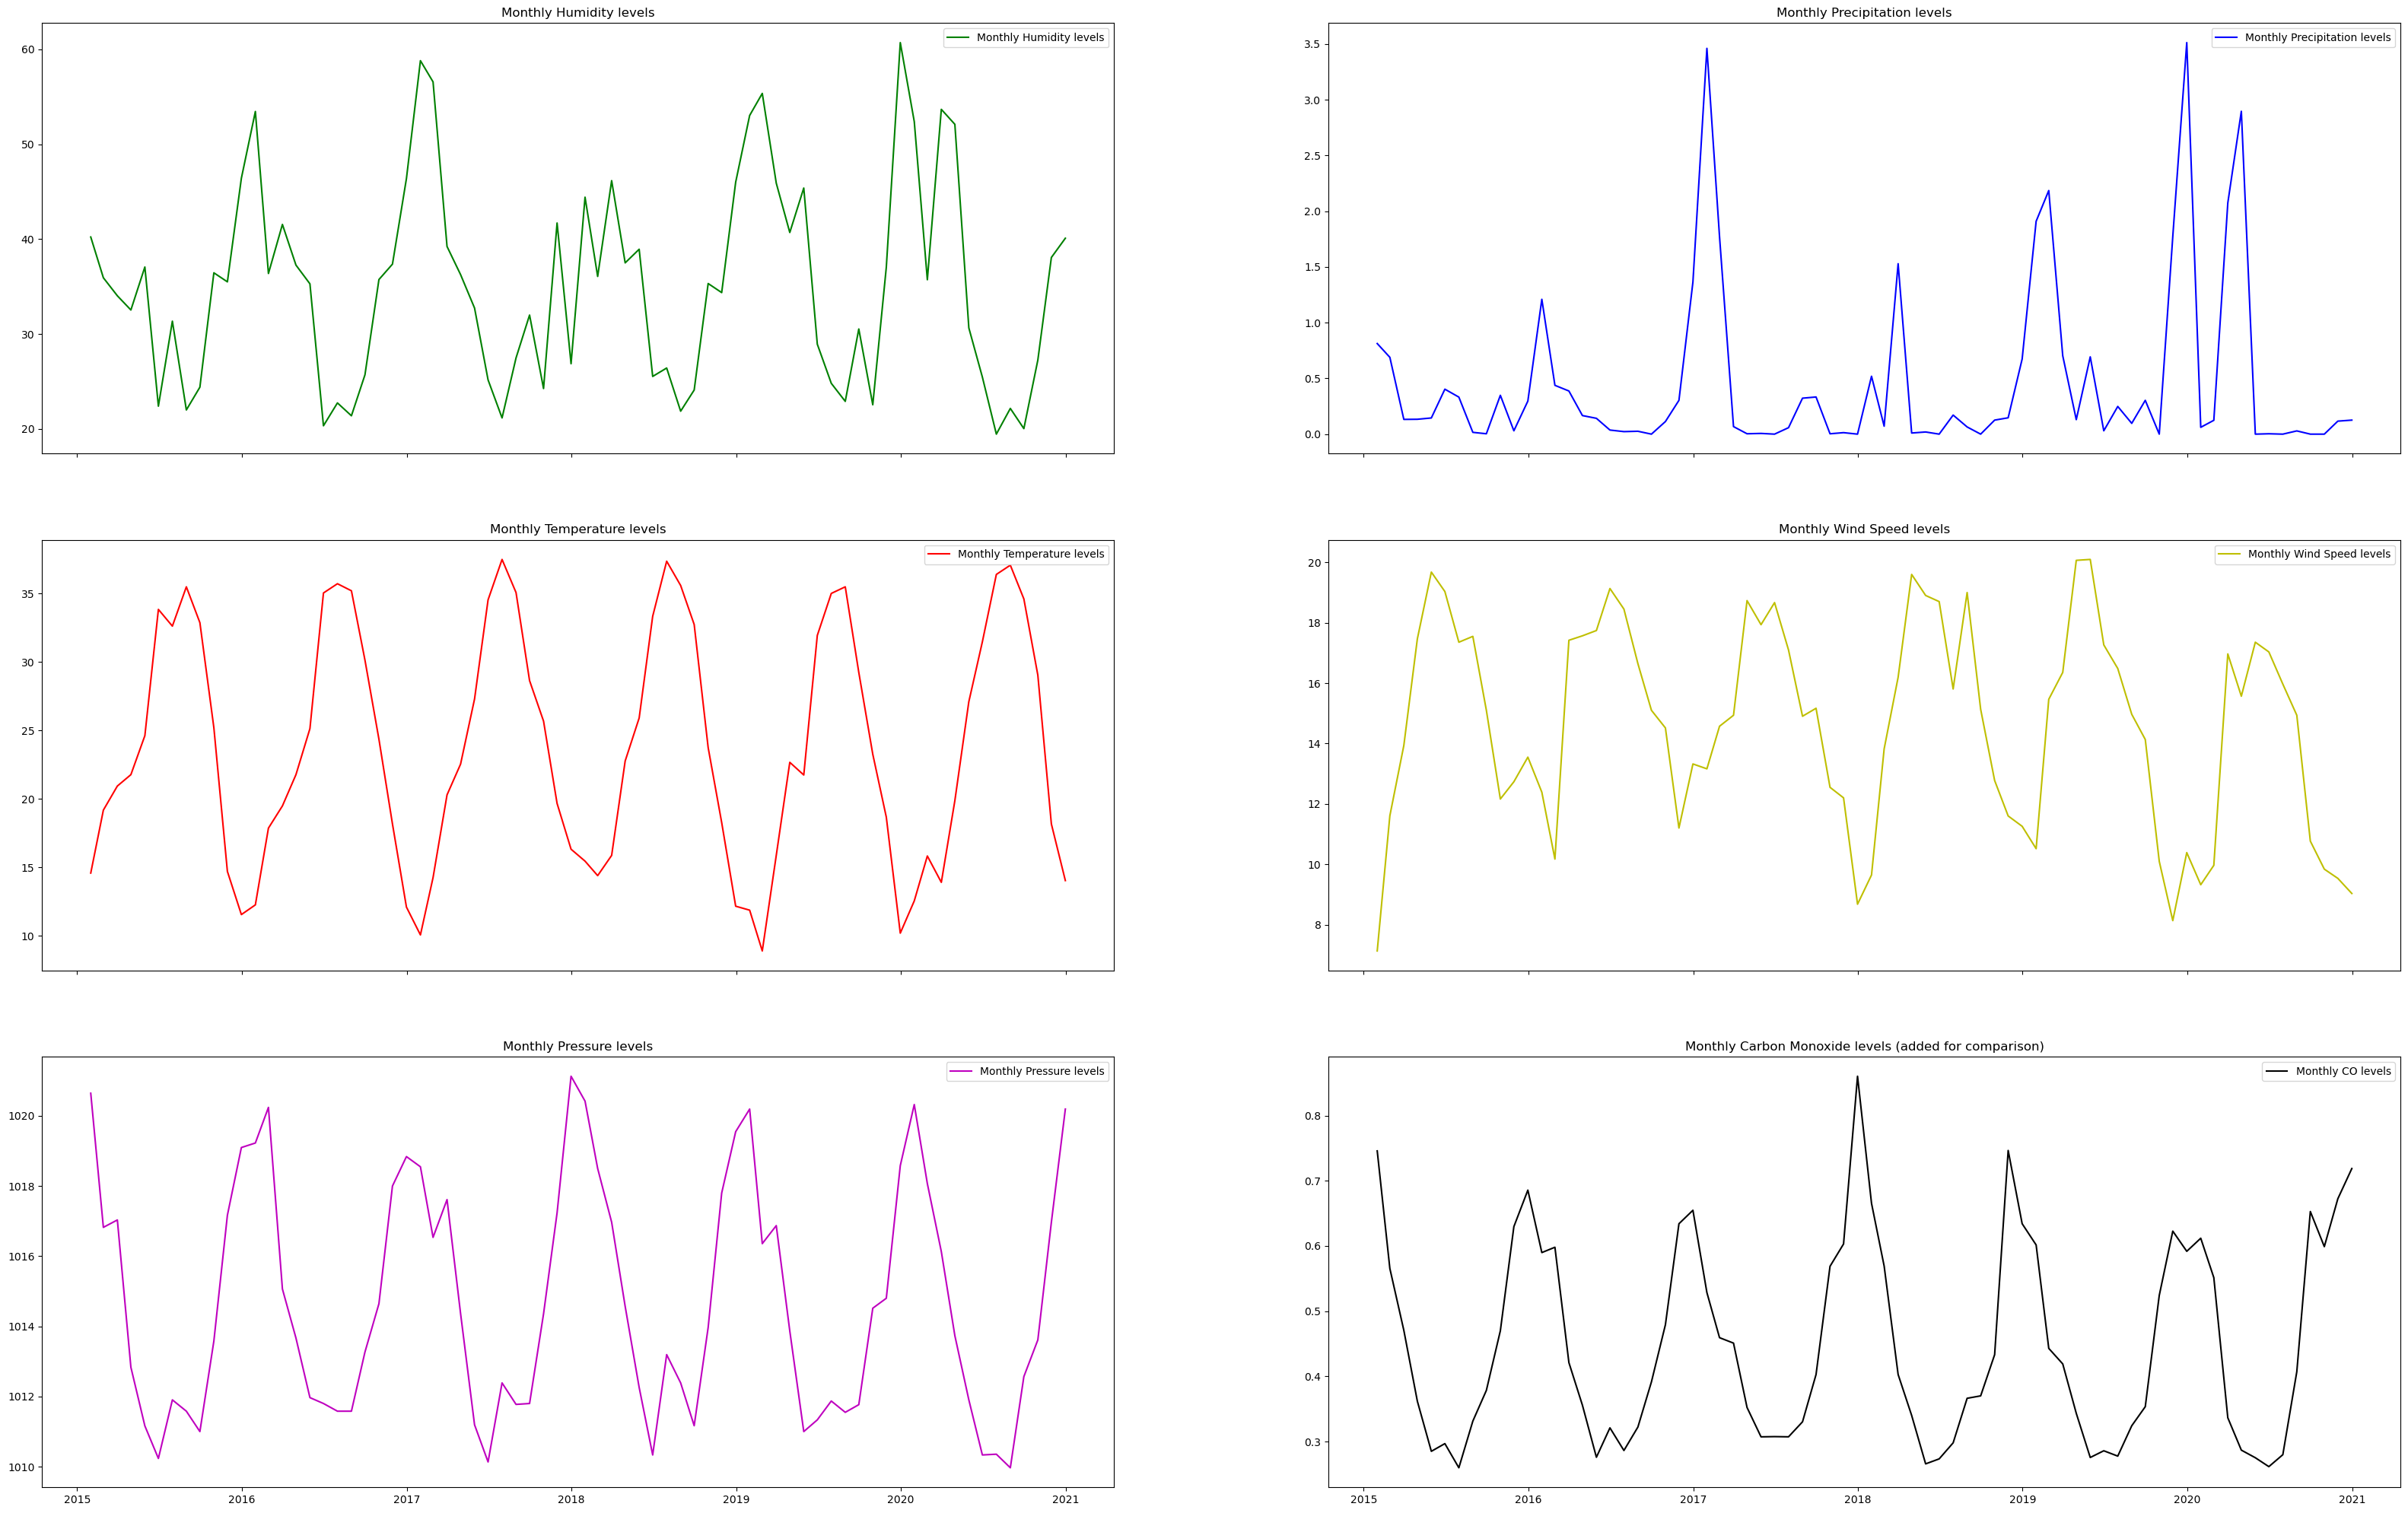

In [29]:
fig,ax = plt.subplots(3,2, figsize = (40,25), sharex = True)
ax[0,0].plot(pollution_month["date_time"],pollution_month['humidity'], color = "g", label = "Monthly Humidity levels")
ax[0,0].set_title("Monthly Humidity levels")
ax[0,1].plot(pollution_month["date_time"],pollution_month['precipMM'], color = "b", label = "Monthly Precipitation levels")
ax[0,1].set_title("Monthly Precipitation levels")
ax[1,0].plot(pollution_month["date_time"],pollution_month['tempC'], color = "r", label = "Monthly Temperature levels")
ax[1,0].set_title("Monthly Temperature levels")
ax[1,1].plot(pollution_month["date_time"],pollution_month['windspeedKmph'], color = "y", label = "Monthly Wind Speed levels")
ax[1,1].set_title("Monthly Wind Speed levels")
ax[2,0].plot(pollution_month["date_time"],pollution_month['pressure'], color = "m", label = "Monthly Pressure levels")
ax[2,0].set_title("Monthly Pressure levels")
ax[2,0].legend()
ax[2,1].plot(pollution_month["date_time"],pollution_month['CO_Conc'], color = "k", label = "Monthly CO levels")
ax[2,1].set_title("Monthly Carbon Monoxide levels (added for comparison)")
ax[2,1].legend()
ax[0,0].legend()
ax[0,1].legend()
ax[1,1].legend()
ax[1,0].legend()
plt.show()

Here, we analyze the weather data in California to see its relation with Carbon Monoxide levels. We can see that Wind Speed and Temperature levels look negatively correlated with Carbon Monoxide levels while Pressure levels look positively correlated with Carbon Monoxide levels.

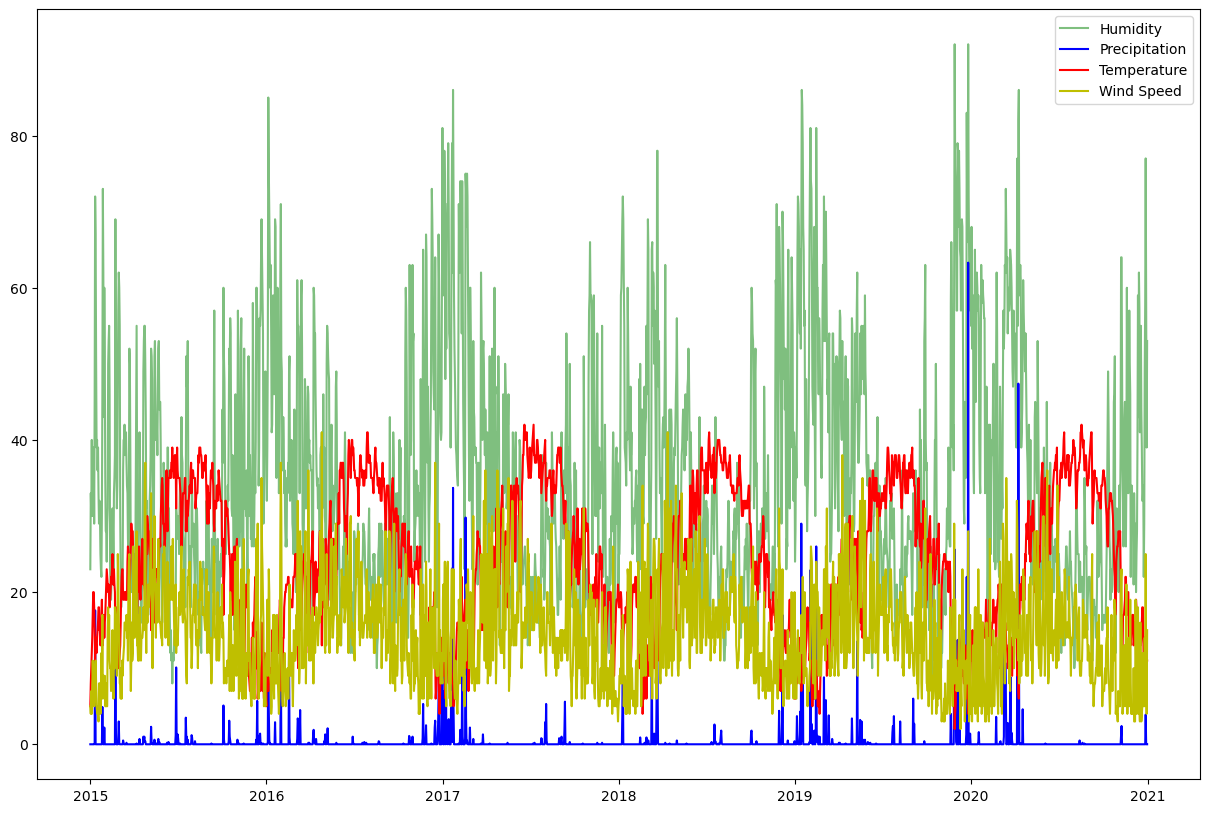

In [30]:
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(pollution["date_time"],pollution['humidity'], color = "g", label = "Humidity", alpha = 0.5)
ax.plot(pollution["date_time"],pollution['precipMM'], color = "blue", label = "Precipitation")
ax.plot(pollution["date_time"],pollution['tempC'], color = "red", label = "Temperature")
ax.plot(pollution["date_time"],pollution['windspeedKmph'], color = "y", label = "Wind Speed")
ax.legend(loc = 'upper right')
plt.show()

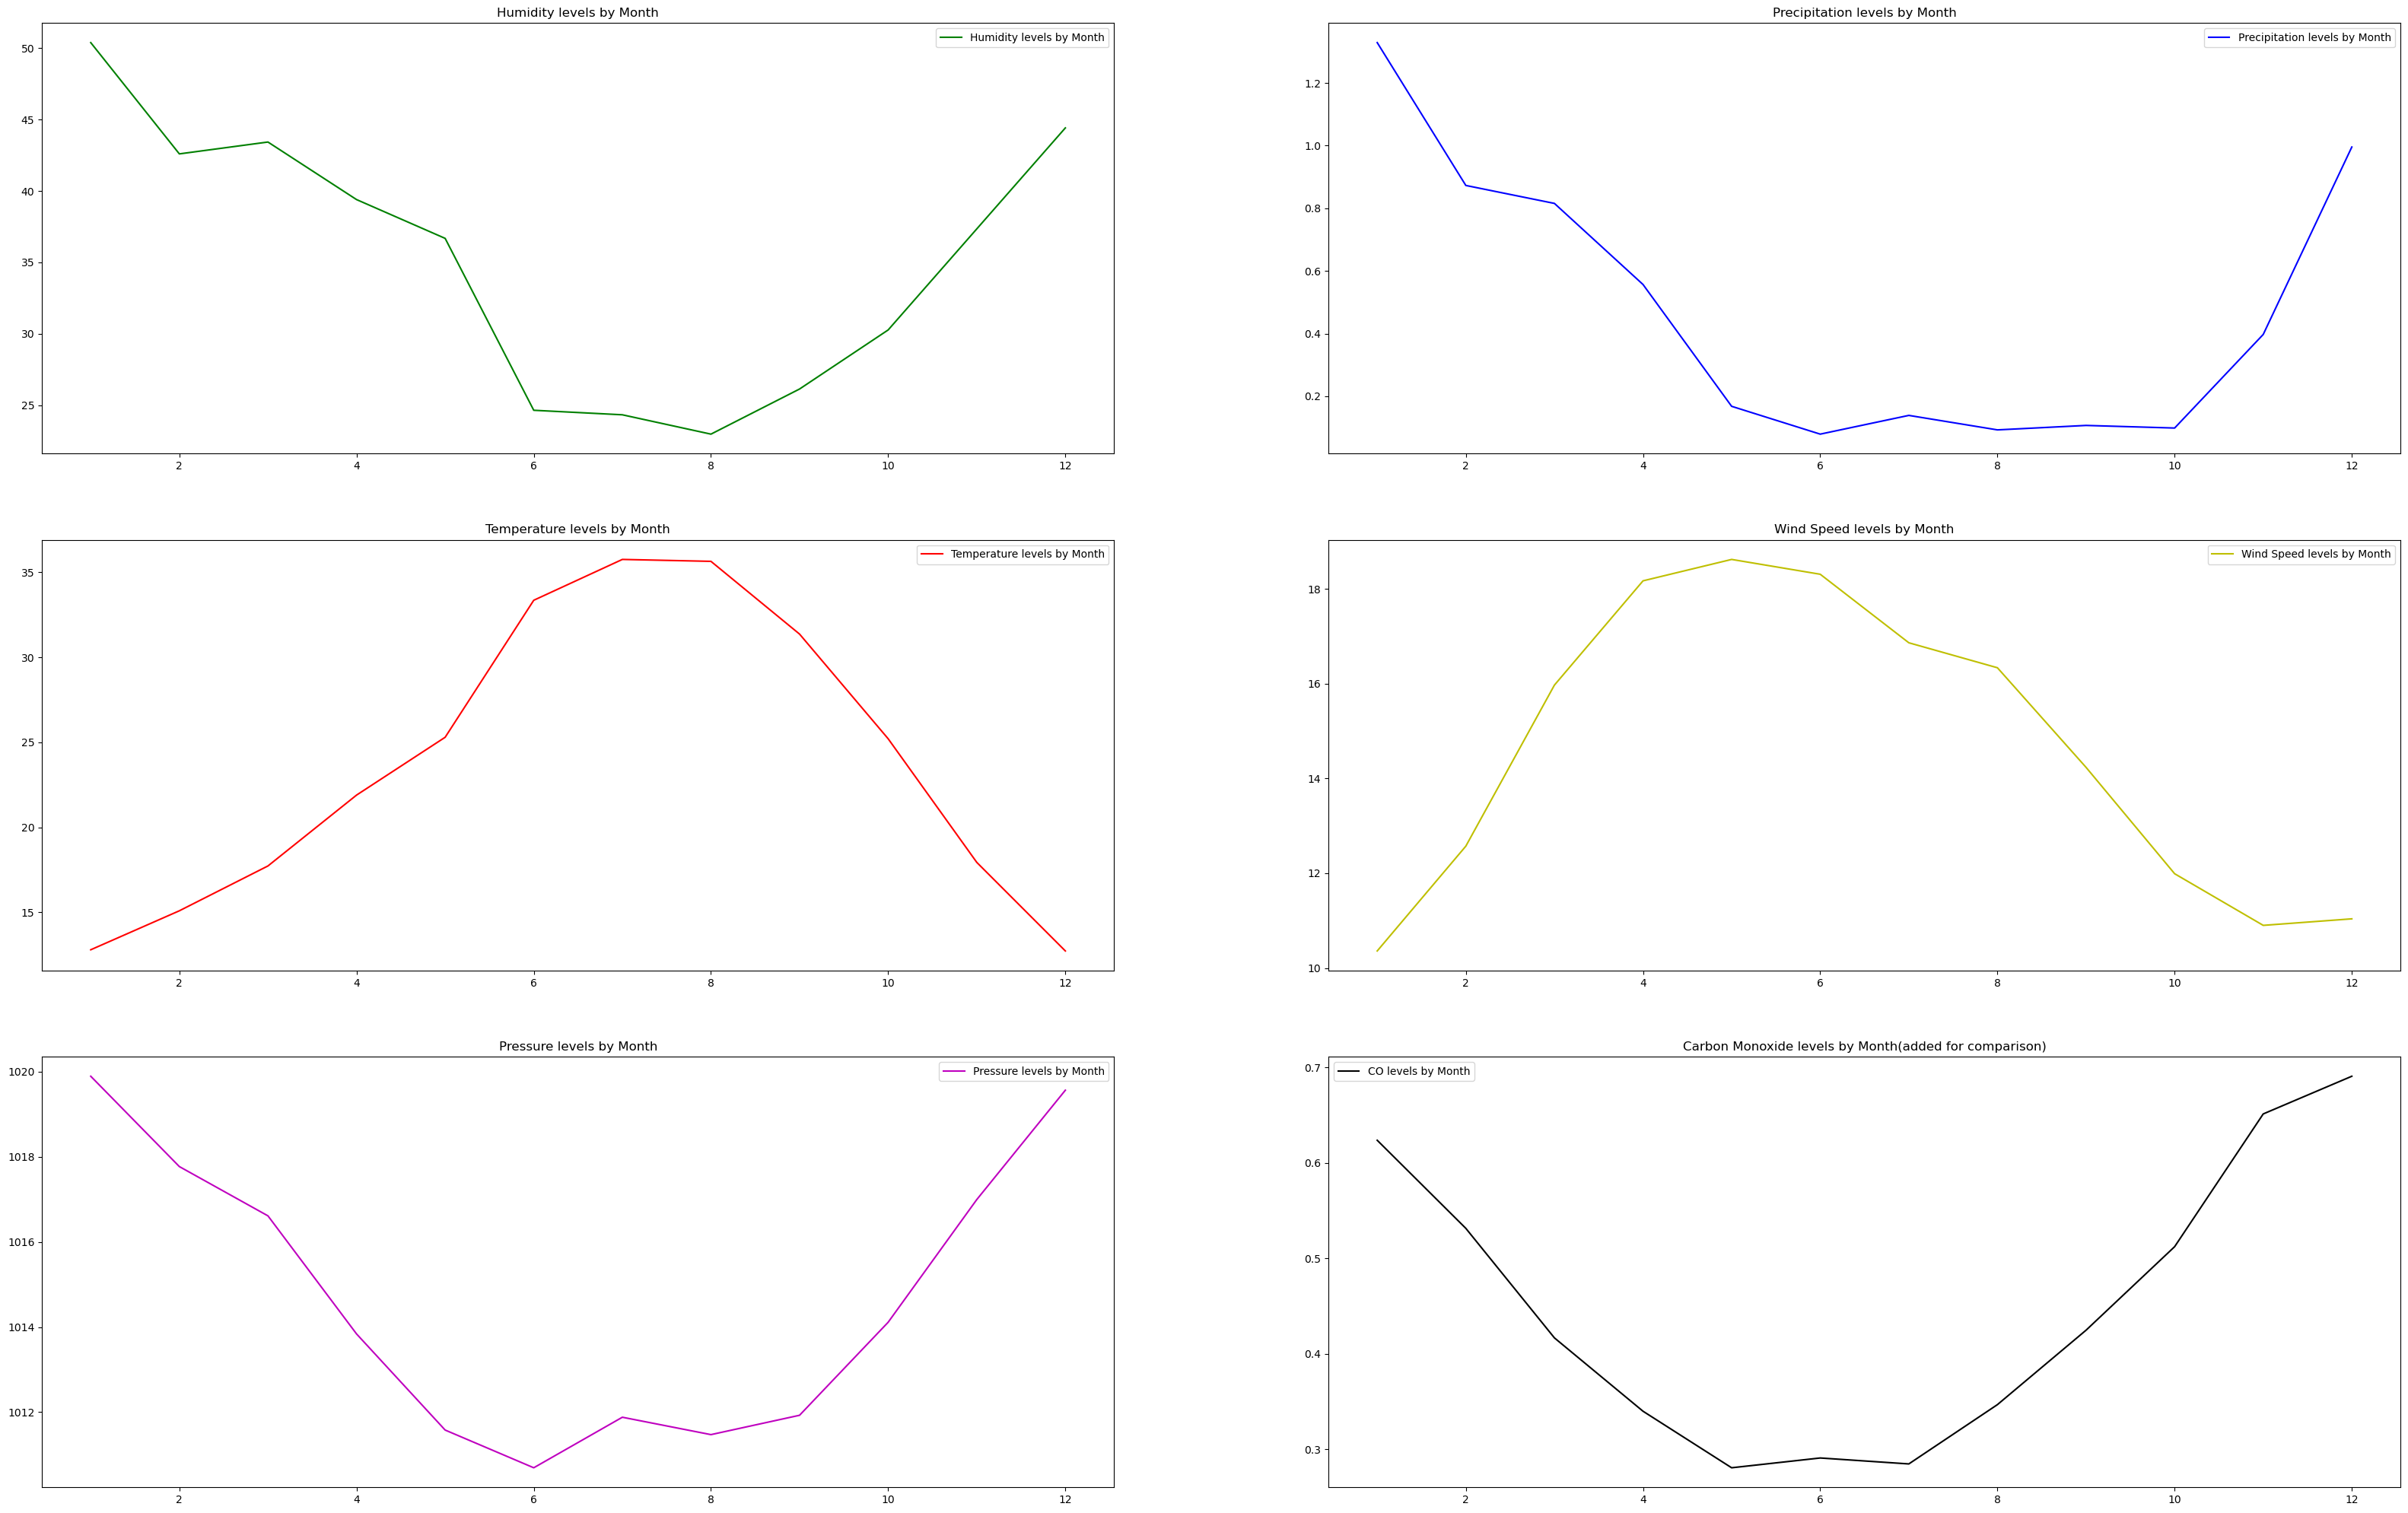

In [31]:
weather_by_month = pollution.groupby([pollution["date_time"].dt.month]).mean().reset_index()
fig,ax = plt.subplots(3,2, figsize = (40,25), sharex = False)
ax[0,0].plot(weather_by_month["date_time"],weather_by_month['humidity'], color = "g", label = "Humidity levels by Month")
ax[0,0].set_title("Humidity levels by Month")
ax[0,1].plot(weather_by_month["date_time"],weather_by_month['precipMM'], color = "b", label = "Precipitation levels by Month")
ax[0,1].set_title("Precipitation levels by Month")
ax[1,0].plot(weather_by_month["date_time"],weather_by_month['tempC'], color = "r", label = "Temperature levels by Month")
ax[1,0].set_title("Temperature levels by Month")
ax[1,1].plot(weather_by_month["date_time"],weather_by_month['windspeedKmph'], color = "y", label = "Wind Speed levels by Month")
ax[1,1].set_title("Wind Speed levels by Month")
ax[2,0].plot(weather_by_month["date_time"],weather_by_month['pressure'], color = "m", label = "Pressure levels by Month")
ax[2,0].set_title("Pressure levels by Month")
ax[2,0].legend()
ax[2,1].plot(weather_by_month["date_time"],weather_by_month['CO_Conc'], color = "k", label = "CO levels by Month")
ax[2,1].set_title("Carbon Monoxide levels by Month(added for comparison)")
ax[2,1].legend()
ax[0,0].legend()
ax[0,1].legend()
ax[1,1].legend()
ax[1,0].legend()
plt.show()

These graphs reiterate the above observations. We can see during the spring and summer months (April to Aug) temperature and wind speed levels tend to be at their highest, while pressure, precipitation and humidity are at their lowest.

In [32]:
pollution.groupby("weekday").mean().reset_index()

,weekday,humidity,precipMM,pressure,tempC,windspeedKmph,CO_Conc
0,Friday,35.054313,0.422045,1014.798722,23.884984,14.309904,0.463237
1,Monday,35.520767,0.438339,1014.575080,23.527157,15.389776,0.436790
2,Saturday,35.236422,0.396805,1014.616613,23.968051,14.597444,0.458606
3,Sunday,35.664537,0.464856,1014.450479,23.789137,15.121406,0.436902
4,Thursday,35.423567,0.760828,1014.761146,23.601911,14.824841,0.452502
5,Tuesday,34.709265,0.305751,1014.830671,23.722045,14.166134,0.444241
6,Wednesday,34.757188,0.500000,1014.779553,23.897764,13.916933,0.452022


This was a fun little task to see if the day of the week had any impact on our variables. For most variables it looks like there wasn't a significant change. However, one can see that Thursdays normally have the most rain and Mondays tend to be the windiest

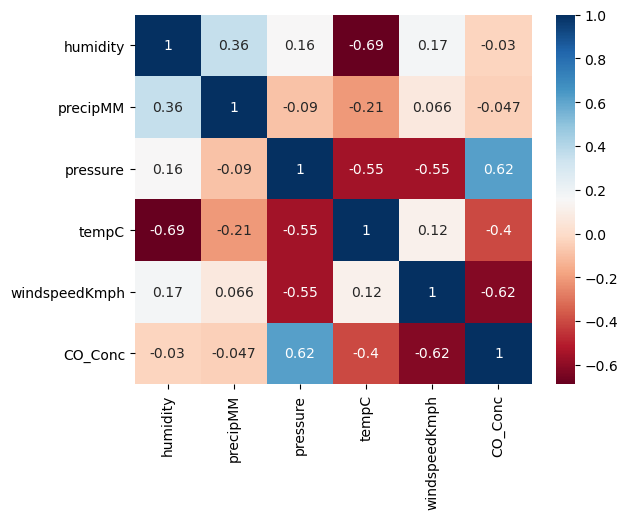

In [36]:
sns.heatmap(pollution.corr(), annot = True, cmap="RdBu")
plt.show()

The correlation matrix matches with our observations above. We can now move on to predicting carbon monoxide levels using ARIMA and weather data

In [37]:
pollution.to_csv("CO_Pollution_Final.csv", index = False)

Resources used:  
https://towardsai.net/p/data-visualization/statistical-modeling-of-time-series-data-part-2-exploratory-data-analysis  
https://statisticsbyjim.com/time-series/autocorrelation-partial-autocorrelation/  
https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322  
https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd  